In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tmx = pd.read_csv("../data/001_raw/temixco.csv", usecols=[0,2], index_col=0, parse_dates=True)
tmx

,Ig
time,
2018-01-01 00:00:00,NaN
2018-01-01 00:10:00,0.0
2018-01-01 00:20:00,0.0
2018-01-01 00:30:00,0.0
2018-01-01 00:40:00,0.0
...,...
2018-12-31 23:10:00,0.0
2018-12-31 23:20:00,0.0
2018-12-31 23:30:00,0.0


In [4]:
tmx.resample("H").mean()

,Ig
time,
2018-01-01 00:00:00,0.0
2018-01-01 01:00:00,0.0
2018-01-01 02:00:00,0.0
2018-01-01 03:00:00,0.0
2018-01-01 04:00:00,0.0
...,...
2018-12-31 19:00:00,0.0
2018-12-31 20:00:00,0.0
2018-12-31 21:00:00,0.0


In [16]:
dias_mean = tmx.groupby(by=[tmx.index.hour]).mean()
dias_max  = tmx.groupby(by=[tmx.index.hour]).max()
dias_min  = tmx.groupby(by=[tmx.index.hour]).min()

<AxesSubplot:xlabel='time'>

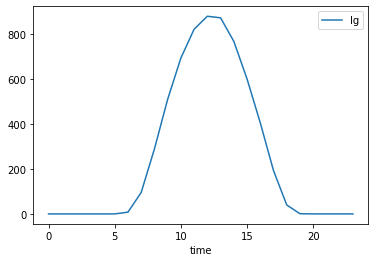

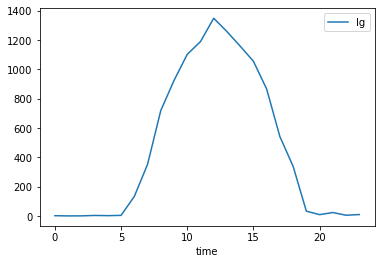

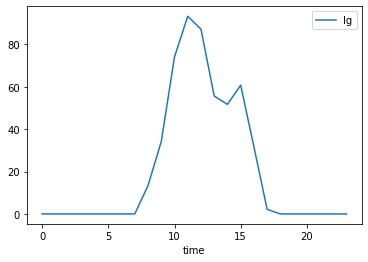

In [18]:
dias_mean.plot()
dias_max.plot()
dias_min.plot() 

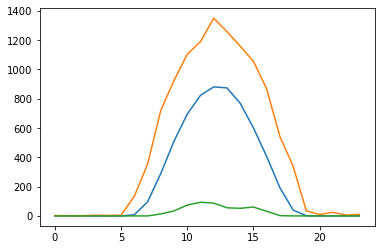

In [19]:
fig, ax = plt.subplots()
ax.plot(dias_mean)
ax.plot(dias_max)
ax.plot(dias_min)

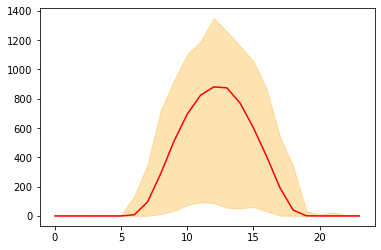

In [24]:
fig, ax = plt.subplots()
ax.fill_between(x=dias_mean.index, y1=dias_min.Ig, y2=dias_max.Ig, color="orange", alpha=0.3)
ax.plot(dias_mean, color="red")

In [34]:
dias_mean = tmx.groupby(by=[tmx.index.Minute]).mean()
dias_max  = tmx.groupby(by=[tmx.index.Minute]).max()
dias_min  = tmx.groupby(by=[tmx.index.Minute]).min()

AttributeError: 'DatetimeIndex' object has no attribute 'Minute'

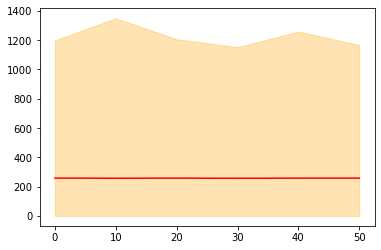

In [33]:
fig, ax = plt.subplots()
ax.fill_between(x=dias_mean.index, y1=dias_min.Ig, y2=dias_max.Ig, color="orange", alpha=0.3)
ax.plot(dias_mean, color="red")

In [30]:
dias_mean

,Ig
time,
2018-01-01 00:00:00,NaN
2018-01-01 00:10:00,0.0
2018-01-01 00:20:00,0.0
2018-01-01 00:30:00,0.0
2018-01-01 00:40:00,0.0
...,...
2018-12-31 23:10:00,0.0
2018-12-31 23:20:00,0.0
2018-12-31 23:30:00,0.0
